In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm

#plt.rc('font',family='AppleGothic')
# font_location = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_location = 'C:/Windows/Fonts/Malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Malgun Gothic


In [3]:
# plyaer data load 및 정리(프로필)
player_df = pd.read_csv('./data/players_all.csv')
player_df = player_df.rename(columns={'Unnamed: 0':'Id'}).drop(['No.', 'Id'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: './data/players_all.csv'

In [ ]:
# 1xbet data load 및 정리(스텟)
xbet_df = pd.read_csv('./data/1xbet_all.csv')
xbet_df = xbet_df.drop(['Team','Age','Position'], axis=1).rename(columns={'Drb_x':'Drb_Off', 'Drb_y':'Drb_Def'})

In [ ]:
# understat data load 및 정리(스텟)
understat_df = pd.read_csv('./data/understat_all0.csv')
understat_df = understat_df.drop(['No','Team'], axis=1)

In [ ]:
# capology load(연봉)
capology_df = pd.read_csv('./data/capology_all0.csv')

In [ ]:
# 프로필 + 연봉
eda_df = player_df.merge(capology_df[['Weekly Salary','Base Salary','ADJ Salary','Name', 'year']], how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df = eda_df[~eda_df.duplicated(['year', 'Name'], keep='first')] # 중복 제거

In [ ]:
# 프로필 + 연봉 + 스텟(understat)
eda_df = eda_df.merge(understat_df, how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])

In [ ]:
# 프로필 + 연봉 + 스텟(understat) + 스텟(1xbet)
eda_df = eda_df.merge(
    xbet_df[[
        'Name', 'year', 'SpG', 'KeyP', 'Drb_Off', 'Fouled', 'Off',
        'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter','Fouls',
        'Offsides', 'Clear', 'Drb_Def', 'Blocks', 'AvgP', 'PS%']],
    how='left',
    left_on=['Name', 'year'],
    right_on=['Name', 'year']
)

In [ ]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4756 non-null   int64  
 1   Name           4756 non-null   object 
 2   Age            4756 non-null   int64  
 3   Team           4756 non-null   object 
 4   Position       4756 non-null   object 
 5   Weekly Salary  4598 non-null   float64
 6   Base Salary    4598 non-null   float64
 7   ADJ Salary     4598 non-null   float64
 8   Apps           4744 non-null   float64
 9   Min            4744 non-null   float64
 10  G              4744 non-null   float64
 11  NPG            4744 non-null   float64
 12  A              4744 non-null   float64
 13  xG             4744 non-null   float64
 14  NPxG           4744 non-null   float64
 15  xA             4744 non-null   float64
 16  xGChain        4744 non-null   float64
 17  xGBuildup      4744 non-null   float64
 18  xG90    

In [ ]:
eda_df = eda_df.dropna()

In [ ]:
round(eda_df.describe(), 2)

,year,Age,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,NPG,A,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
count,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,...,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00
mean,2017.93,25.91,53921.12,2803898.52,3076834.48,20.58,1466.58,1.96,1.81,1.39,...,6.65,1.12,0.78,0.70,0.13,1.53,0.61,0.22,29.00,76.91
std,2.60,4.21,52782.05,2744666.44,2942732.53,11.49,1032.21,3.52,3.18,2.19,...,0.36,0.84,0.70,0.46,0.23,1.75,0.48,0.29,16.44,12.42
min,2014.00,15.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,4.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2016.00,23.00,20000.00,1040000.00,1252784.00,11.00,532.50,0.00,0.00,0.00,...,6.40,0.50,0.18,0.38,0.00,0.33,0.25,0.00,17.00,72.73
50%,2018.00,26.00,40000.00,2080000.00,2301310.00,22.00,1390.00,1.00,1.00,1.00,...,6.65,1.00,0.65,0.68,0.00,0.86,0.53,0.11,27.29,79.32
75%,2020.00,29.00,70000.00,3640000.00,4071549.00,31.00,2326.25,2.00,2.00,2.00,...,6.88,1.63,1.20,1.00,0.15,2.09,0.88,0.33,38.44,84.32
max,2022.00,41.00,600000.00,31200000.00,33671679.00,38.00,3420.00,36.00,31.00,20.00,...,8.34,7.00,4.22,4.00,2.00,11.50,4.00,2.05,90.41,100.00


In [ ]:
eda_df['Age Lev'] = eda_df['Age'].apply(lambda age: '<21' if age < 21 else '32<' if age>32 else f'{age}')

In [ ]:
static_df = eda_df[eda_df['Min'] > 1000].groupby(['Position', 'Age Lev']).mean(numeric_only=True)
forward_static_df = static_df.loc['Forward']

In [ ]:
forward_eda_df = eda_df[(eda_df['Position'] == 'Defender') & (eda_df['Team'].isin(['Man City']))]

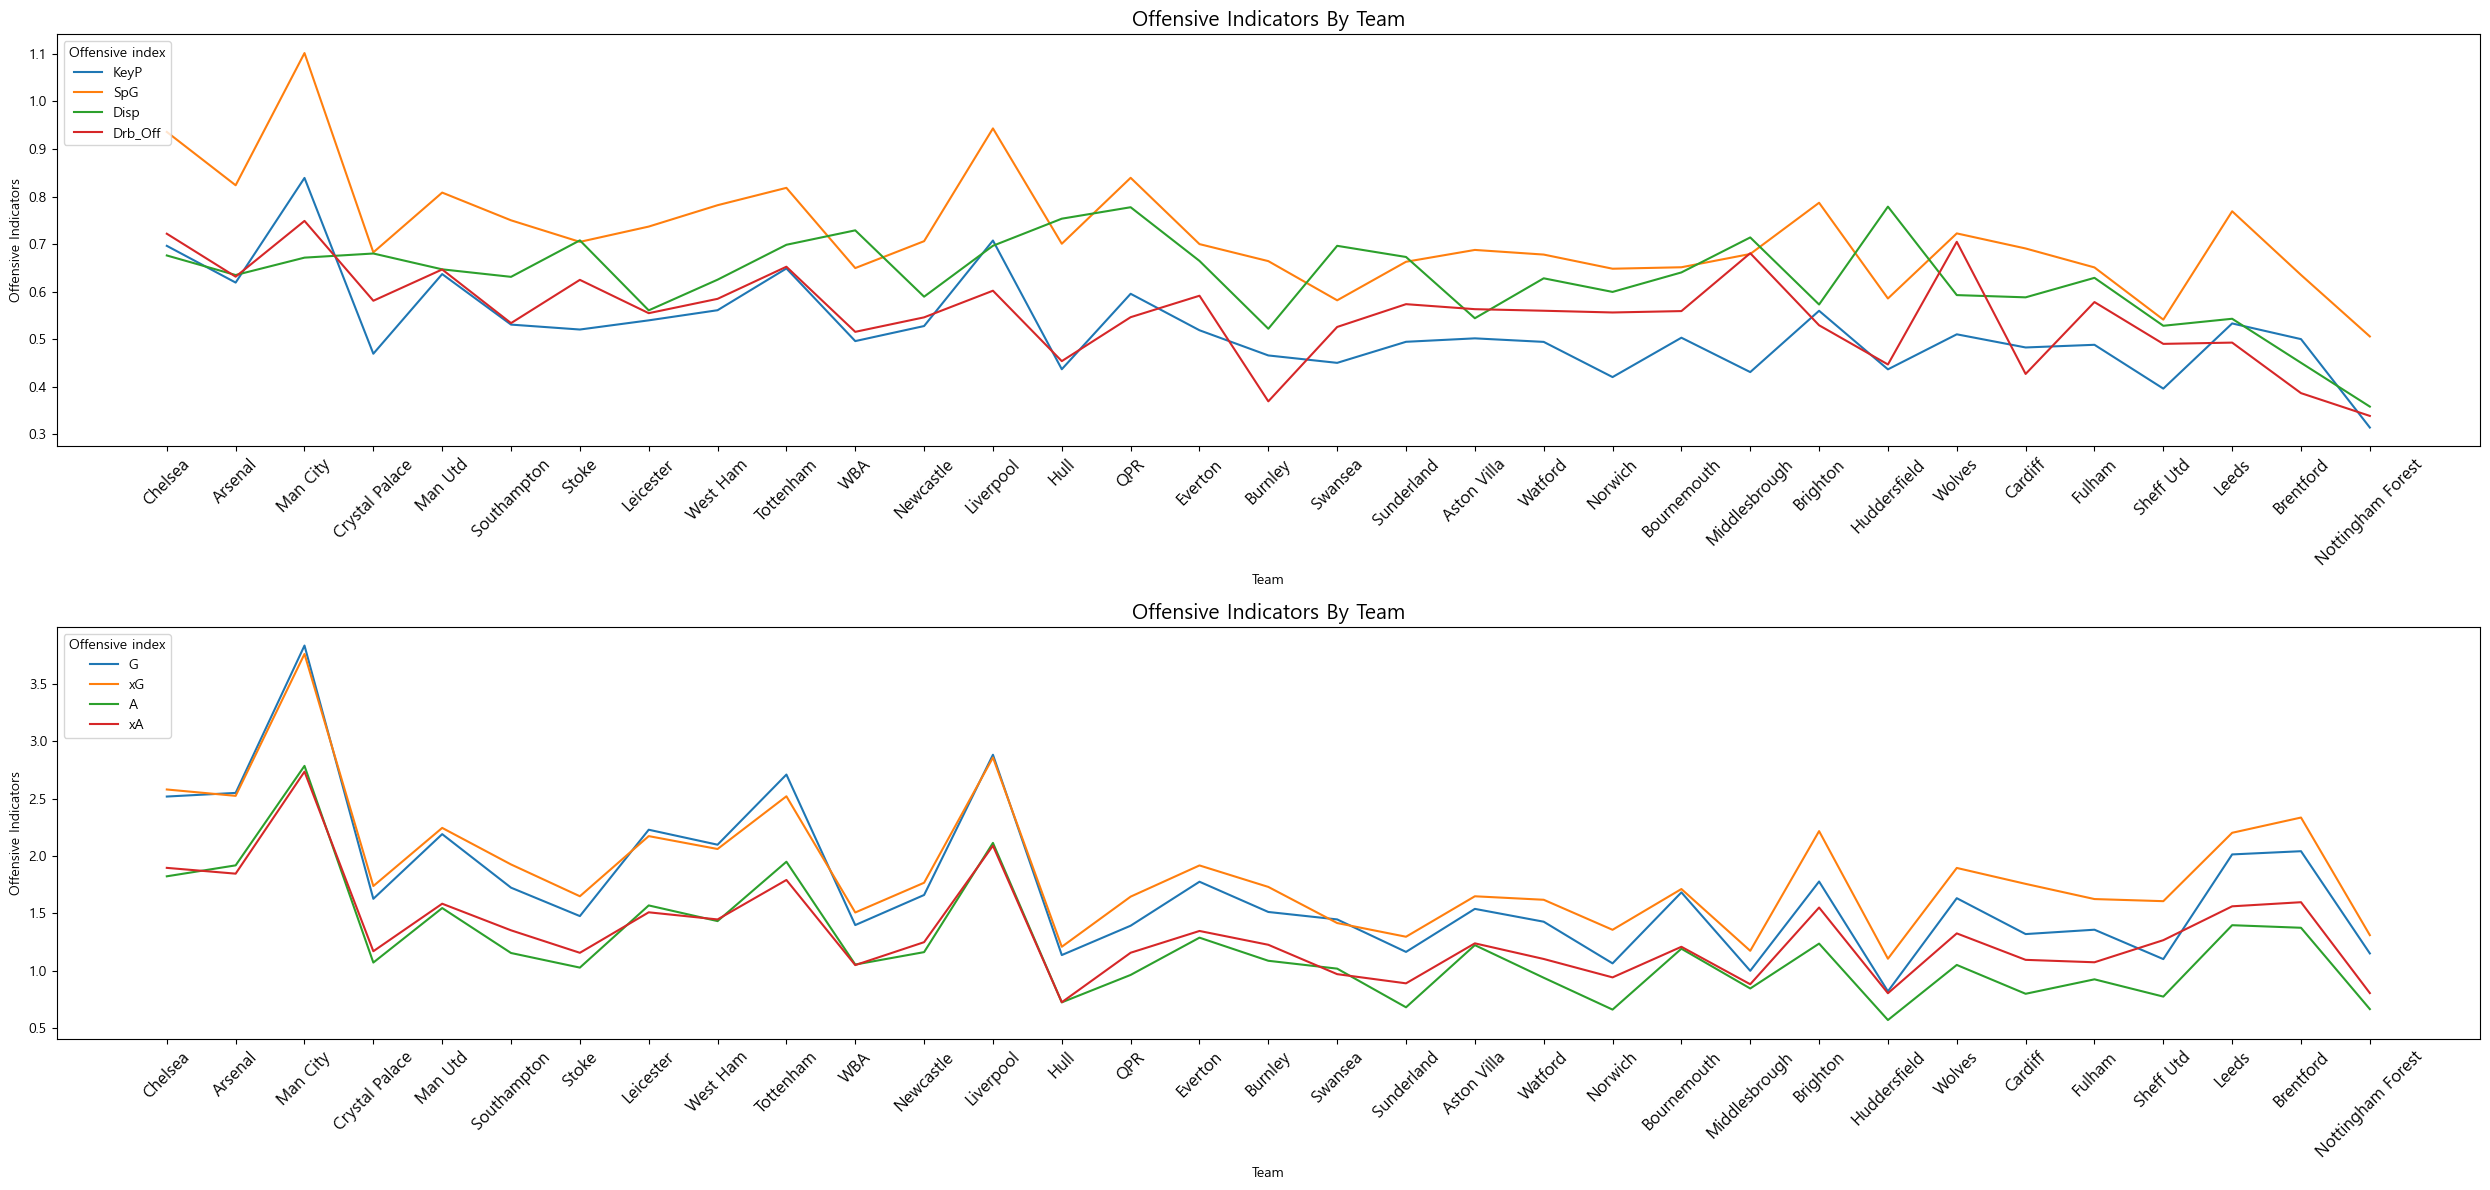

In [ ]:
plt.figure(figsize=(25, 12))
plt.subplot(2, 1, 1)
sns.lineplot(data=eda_df, x='Team', y='KeyP', label='KeyP',errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='SpG', label='SpG',errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='Disp', label='Disp',errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='Drb_Off', label='Drb_Off',errorbar=None)
plt.title("Offensive Indicators By Team",fontsize = 15, y=1)
plt.xlabel('Team', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Offensive Indicators", fontsize=12)
plt.legend(title='Offensive index',loc='upper left')

plt.subplot(2, 1, 2)
sns.lineplot(data=eda_df, x='Team', y='G', label='G',errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='xG', label='xG',errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='A', label='A',errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='xA', label='xA',errorbar=None)
plt.title("Offensive Indicators By Team",fontsize = 15, y=1)
plt.xlabel('Team', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Offensive Indicators", fontsize=12)
plt.legend(title='Offensive index',loc='upper left')

plt.tight_layout()
plt.show()

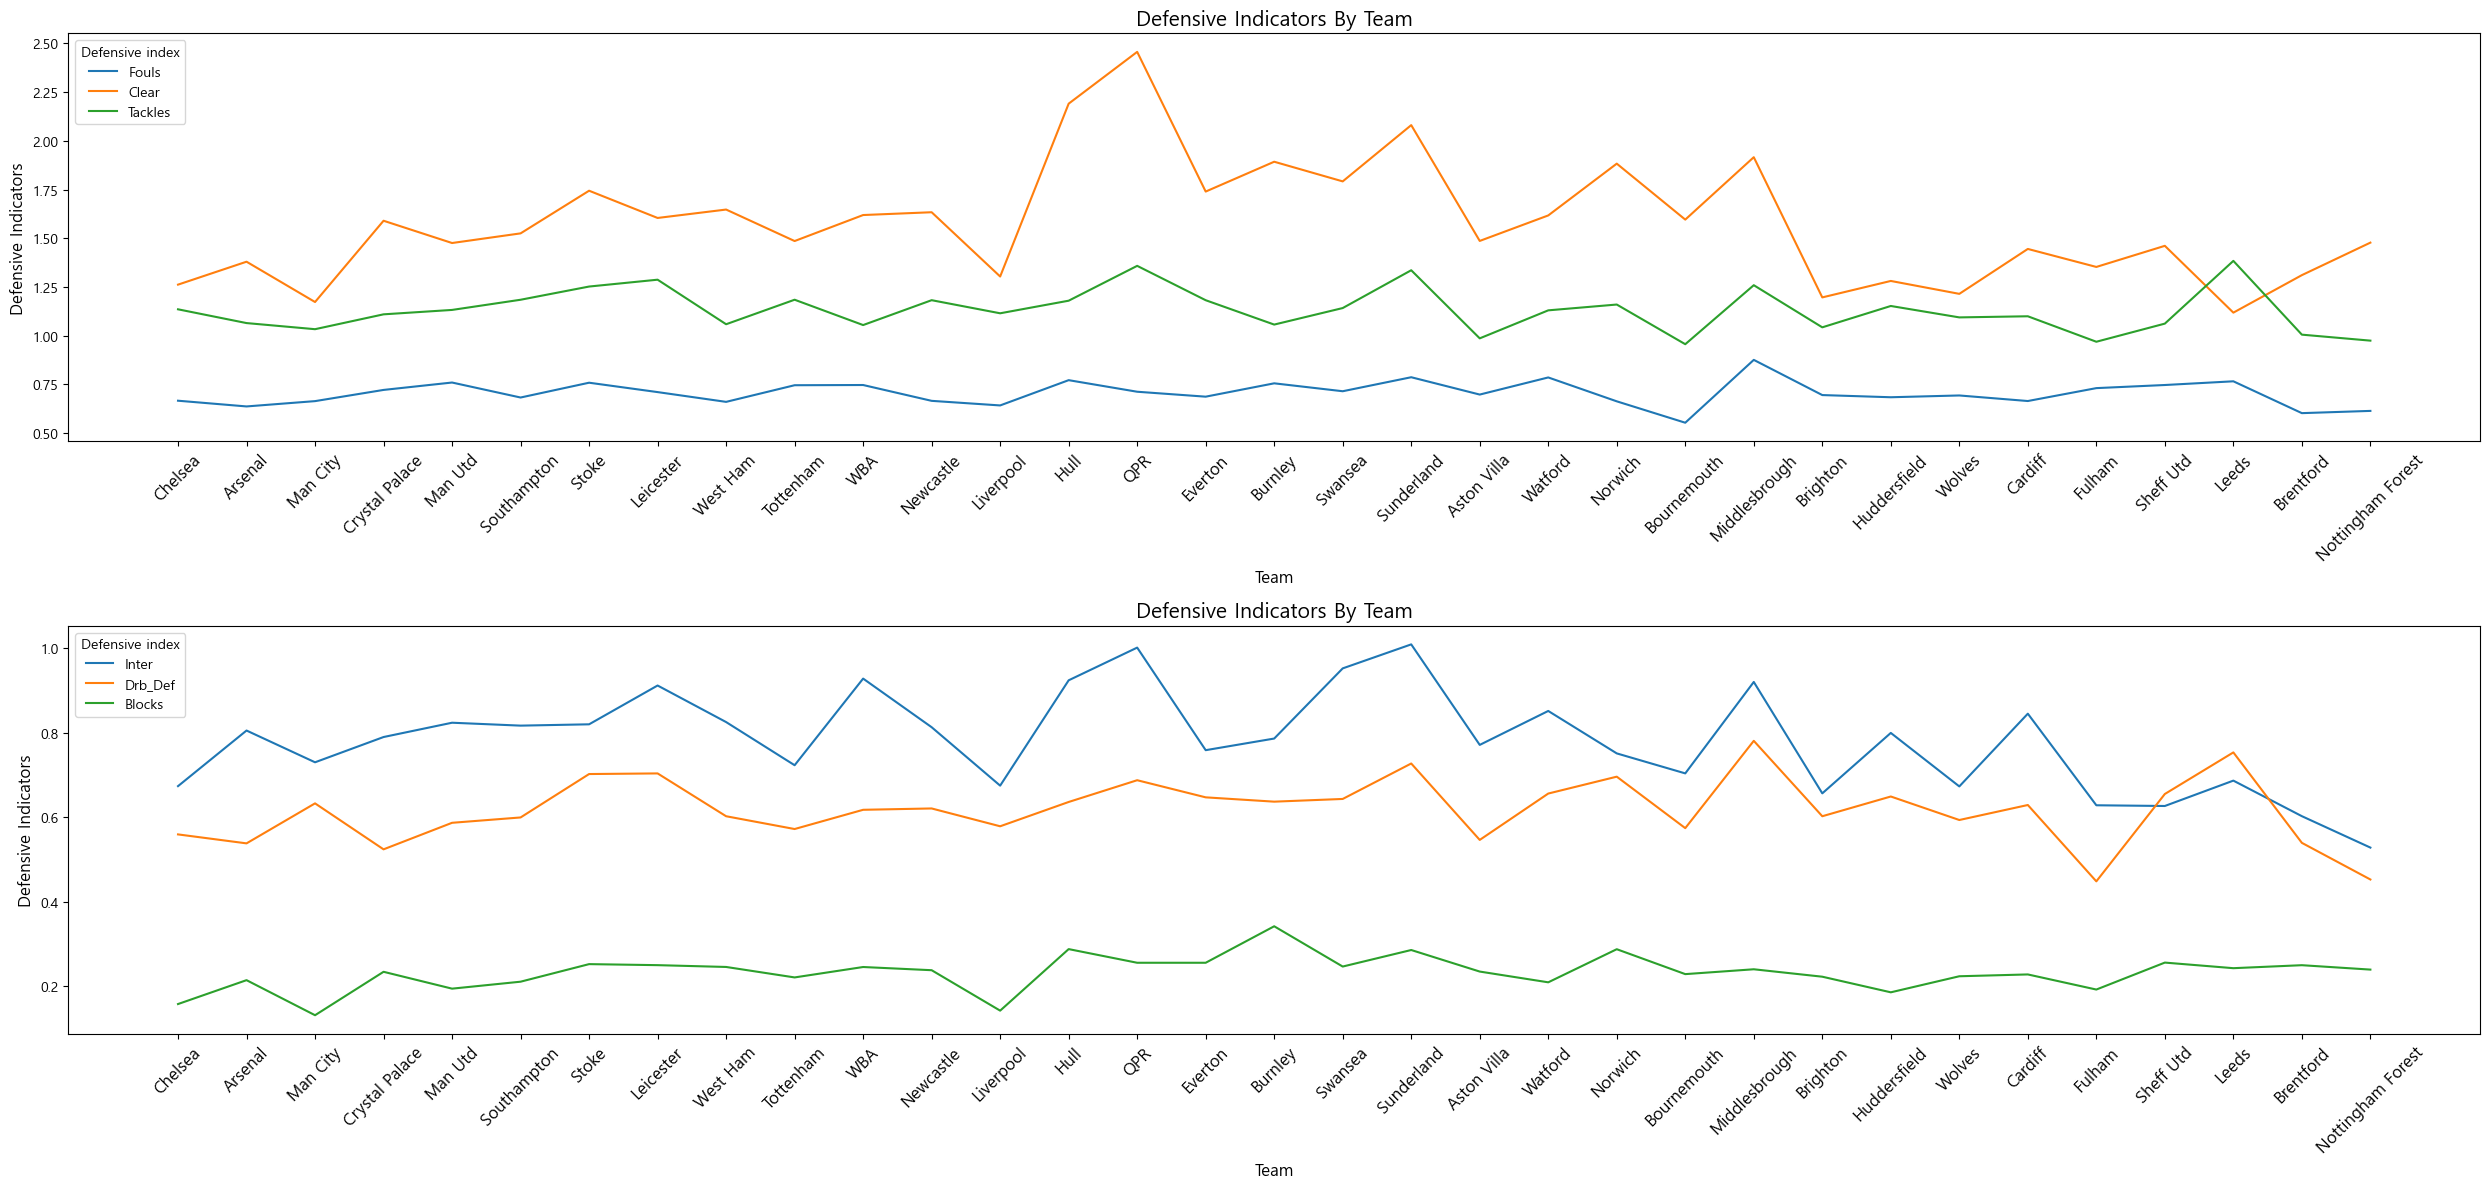

In [ ]:
plt.figure(figsize=(25, 12))
plt.subplot(2, 1, 1)
sns.lineplot(data=eda_df, x='Team', y='Fouls', label='Fouls', errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='Clear', label='Clear', errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='Tackles', label='Tackles', errorbar=None)
plt.title("Defensive Indicators By Team",fontsize = 15, y=1)
plt.xlabel('Team', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Defensive Indicators", fontsize=12)
plt.legend(title='Defensive index', loc='upper left')

plt.subplot(2, 1, 2)
sns.lineplot(data=eda_df, x='Team', y='Inter', label='Inter', errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='Drb_Def', label='Drb_Def', errorbar=None)
sns.lineplot(data=eda_df, x='Team', y='Blocks', label='Blocks', errorbar=None)
plt.title("Defensive Indicators By Team",fontsize = 15, y=1)
plt.xlabel('Team', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Defensive Indicators", fontsize=12)
plt.legend(title='Defensive index', loc='upper left')


plt.tight_layout()
plt.show()